In [132]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [133]:
# Load the dataset
truenews = pd.read_csv('/content/sample_data/True.csv')
fakenews = pd.read_csv('/content/sample_data/Fake.csv')

In [134]:
fakenews.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [135]:
fakenews.describe()

,title,text,subject,date
count,23481,23481,23481,23481
unique,17903,17455,6,1681
top,MEDIA IGNORES Time That Bill Clinton FIRED His...,,News,"May 10, 2017"
freq,6,626,9050,46


In [136]:
truenews.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [137]:
truenews.describe()

,title,text,subject,date
count,21417,21417,21417,21417
unique,20826,21192,2,716
top,Factbox: Trump fills top jobs for his administ...,(Reuters) - Highlights for U.S. President Dona...,politicsNews,"December 20, 2017"
freq,14,8,11272,182


In [138]:
truenews = truenews[truenews.duplicated('text') == False]
fakenews = fakenews[fakenews.duplicated('text') == False]

In [139]:
fakenews.describe()

,title,text,subject,date
count,17455,17455,17455,17455
unique,17450,17455,5,1681
top,MEDIA IGNORES Time That Bill Clinton FIRED His...,Donald Trump just couldn t wish all Americans ...,News,"May 26, 2016"
freq,3,1,9050,35


In [140]:
truenews.describe()

,title,text,subject,date
count,21192,21192,21192,21192
unique,20821,21192,2,716
top,Factbox: Trump fills top jobs for his administ...,WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 6, 2017"
freq,14,1,11214,166


In [141]:
truenews['True/Fake']='True'
fakenews['True/Fake']='Fake'

<ipython-input-141-23c2d390fb43>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  truenews['True/Fake']='True'
<ipython-input-141-23c2d390fb43>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fakenews['True/Fake']='Fake'


In [142]:

# Combine the 2 DataFrames into a single data frame
news = pd.concat([truenews, fakenews])
news["Article"] = news["title"] + news["text"]
#news["Article"] = news["text"]
news.sample(frac = 1) #Shuffle 100%

,title,text,subject,date,True/Fake,Article
3177,Putin quips he's ready to grant asylum to ex-F...,MOSCOW (Reuters) - Russian President Vladimir ...,politicsNews,"June 15, 2017",True,Putin quips he's ready to grant asylum to ex-F...
11151,PEACE THROUGH STRENGTH: China To Cooperate Wit...,PEACE THROUGH STRENGTH President Reagan showed...,politics,"Apr 12, 2017",Fake,PEACE THROUGH STRENGTH: China To Cooperate Wit...
3851,Students With Trump Sign March Down Halls Cha...,Racists are all jizzed up after Donald Trump s...,News,"November 10, 2016",Fake,Students With Trump Sign March Down Halls Cha...
14596,CHECK OUT NEW BEN & JERRY’S FLAVOR: Touting Am...,"In 2016, Ben & Jerry s co-founder, Ben Cohen s...",politics,"Jan 25, 2016",Fake,CHECK OUT NEW BEN & JERRY’S FLAVOR: Touting Am...
5460,House Democrats escalate effort to obtain Trum...,WASHINGTON (Reuters) - Congressional Democrats...,politicsNews,"February 14, 2017",True,House Democrats escalate effort to obtain Trum...
...,...,...,...,...,...,...
2867,Democrat Forces Trump’s Own Nominee To MOCK H...,Donald Trump is fuming over the size of his li...,News,"January 24, 2017",Fake,Democrat Forces Trump’s Own Nominee To MOCK H...
16041,Islamic state claims responsibility for blast ...,CAIRO (Reuters) - Islamic State has claimed re...,worldnews,"October 31, 2017",True,Islamic state claims responsibility for blast ...
10166,"As tensions escalate, Cruz calls Trump a 'sniv...",WASHINGTON (Reuters) - The feud between Republ...,politicsNews,"March 24, 2016",True,"As tensions escalate, Cruz calls Trump a 'sniv..."
2811,Factbox: Trump on Twitter (July 11) - Mississi...,The following statements were posted to the ve...,politicsNews,"July 12, 2017",True,Factbox: Trump on Twitter (July 11) - Mississi...


In [143]:
#Data Cleaning
import nltk
#nltk.download('stopwords')
#from nltk.corpus import stopwords
import string

In [144]:
#def process_text(article):

    #Check string to see if they are a punctuation
    #nopunc = [char for char in s if char not in string.punctuation]

    #Join the characters again to form the string.
    #nopunc = ''.join(nopunc)

    #Convert string to lowercase and remove stopwords
    #clean_string = " ".join([word.lower() for word in article.split() if word.lower() not in stopwords.words('english')])
    #eturn clean_string



In [145]:
#news['Clean Text'] = [process_text(article) for article in article_array]


In [146]:
import re


In [147]:
#Get rid of (Routers) tags
news['Clean Text'] = news['Article'].apply(lambda x: re.sub(".{0,50}\(Reuters\)", " ", x))
#Remove any bit.ly addresses
news['Clean Text'] = news['Clean Text'].apply(lambda x: re.sub("[^ ]*bit\.ly[^ ]*", " ", x))
#Add spaces after numbers
news['Clean Text'] = news['Clean Text'].apply(lambda x: re.sub("([0-9]+)([a-zA-Z])", lambda x: x.group(1)+" "+x.group(2), x))


In [148]:
news['Clean Text New'] = news['Clean Text'].apply(lambda x: ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x).split()))

In [149]:
nltk.download('words')

from nltk.corpus import words

# Your array of text
article_array = news["Article"]

# Set of English words
english_word_set = set(words.words())

# Function to filter words based on the English dictionary
def filter_english_words(article):
    #return ' '.join([word.lower() for word in article.split() if word.lower() in english_word_set and word.lower() not in set(stopwords.words('english'))])
    return ' '.join([word.lower() for word in article.split() if word.lower() in english_word_set])

# Apply the filter to each article in the array
filtered_articles = [filter_english_words(article) for article in article_array]

# Update the original array with the filtered results
news['Clean Text New New'] = filtered_articles

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [150]:
#re.sub("[0-9]+[a-zA-Z]+", " ", ' '.join(list(news['Article'][30])))

In [151]:
list(news['Clean Text New New'])[30]

'to certify democrat winner of senate democrat surprise victory over republican in this special senate election will be certified on state said on will be the first democrat sent to the senate from republican stronghold in a quarter when he majority in the chamber will narrow to of the governor kay attorney general and secretary of state will meet to certify office said in a margin of victory was percentage not conceded defeat in the despite being by president trump to do and to campaign were not immediately returned on was a controversial candidate whose campaign was beset by that he sexually or teenage while he was in his he the misconduct saying they were a result of'

In [152]:
# Split the data into features (X) and labels (y)
X = news['Clean Text New New']  # Assuming 'text_column' contains the news text
y = news['True/Fake']  # Assuming 'label_column' contains the labels (fake or real)


In [153]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [154]:
# Convert text data to a bag-of-words representation
#bow_transformer = CountVectorizer(analyzer=process_text).fit(news['Clean Text'])
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

In [155]:
print(list(vectorizer.vocabulary_.items())[-10:])

[('millionth', 13132), ('dentition', 5510), ('knapper', 11664), ('mincemeat', 13144), ('wolverine', 23935), ('skulk', 19208), ('debunker', 5227), ('retrievable', 17627), ('allocator', 601), ('encore', 6921)]


In [156]:
#print(len(bow_transformer.vocabulary_)) #Total vocab words
print(len(vectorizer.vocabulary_))

24202


In [157]:
#news_bow = bow_transformer.transform(news['Clean Text'])

In [158]:
# Create and train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_vectorized, y_train)

MultinomialNB()

In [159]:
# Make predictions on the test set
y_pred = nb_classifier.predict(X_test_vectorized)

In [160]:
# Evaluate the performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9402328589909443
Classification Report:
               precision    recall  f1-score   support

        Fake       0.94      0.93      0.93      3486
        True       0.94      0.95      0.95      4244

    accuracy                           0.94      7730
   macro avg       0.94      0.94      0.94      7730
weighted avg       0.94      0.94      0.94      7730

Confusion Matrix:
 [[3233  253]
 [ 209 4035]]


In [170]:
class_names = nb_classifier.classes_
print(class_names[0])

Fake


In [203]:

# Extract feature names from the vectorizer
#feature_names = np.array(bow_transformer.get_feature_names_out())
feature_names = np.array(vectorizer.get_feature_names_out())



# Get the log probabilities for each class (assuming MultinomialNB)
class_probabilities = nb_classifier.feature_log_prob_

# Calculate the feature importance scores
feature_importances = class_probabilities[1] - class_probabilities[0]

# Get indices of the top words associated with true news
top_fake_indices = feature_importances.argsort()[:100]

# Get indices of the top words associated with fake news
top_true_indices = feature_importances.argsort()[-100:][::-1]

# Get the corresponding words
top_true_words = feature_names[top_true_indices]
top_fake_words = feature_names[top_fake_indices]

In [204]:
# Print the top words associated with true news
print("Top words associated with true news:")
print(top_true_words)

# Print the top words associated with fake news
print("\nTop words associated with fake news:")
print(top_fake_words)

Top words associated with true news:
['tusk' 'graft' 'bali' 'unionist' 'shi' 'dup' 'barcelona' 'accession'
 'provincial' 'impasse' 'soe' 'kang' 'extradite' 'ria' 'regulator' 'abbas'
 'secessionist' 'tass' 'corp' 'parliamentary' 'simplify' 'quake' 'wang'
 'taro' 'shale' 'hong' 'reimpose' 'stateless' 'exploratory' 'reshuffle'
 'sap' 'sisi' 'ara' 'microcephaly' 'sao' 'rudd' 'trader' 'afar' 'interval'
 'eu' 'sturgeon' 'pino' 'rivalry' 'tibet' 'separatist' 'xi' 'doina'
 'stalemate' 'tun' 'submarine' 'secession' 'divergence' 'juba'
 'communique' 'extrajudicial' 'bangkok' 'yucca' 'slump' 'deadlock'
 'breakthrough' 'fitch' 'broadcaster' 'parliament' 'ministry' 'labour'
 'nautilus' 'amt' 'plebiscite' 'dampen' 'malnutrition' 'sri' 'nam' 'timor'
 'machar' 'referendum' 'militancy' 'moyo' 'gambia' 'amman' 'abbasi'
 'adjustment' 'repatriation' 'sacked' 'yang' 'tolu' 'landlocked' 'rework'
 'austere' 'petrochemical' 'retook' 'annul' 'separatism' 'yen' 'autonomy'
 'manila' 'bilateral' 'disquiet' 'tough

In [205]:
from nltk.sentiment import SentimentIntensityAnalyzer

# Download VADER lexicon (if not already downloaded)
nltk.download('vader_lexicon')

# Create a SentimentIntensityAnalyzer instance
sid = SentimentIntensityAnalyzer()

# Get sentiment scores for each word
sentiment_scores_true = {word: sid.polarity_scores(word)['compound'] for word in top_true_words}
sentiment_scores_fake = {word: sid.polarity_scores(word)['compound'] for word in top_fake_words}

# Print sentiment scores
for word, score in sentiment_scores_true.items():
    print(f"{word}: {score}")



tusk: 0.0
graft: 0.0
bali: 0.0
unionist: 0.0
shi: 0.0
dup: 0.0
barcelona: 0.0
accession: 0.0
provincial: 0.0
impasse: 0.0
soe: 0.0
kang: 0.0
extradite: 0.0
ria: 0.0
regulator: 0.0
abbas: 0.0
secessionist: 0.0
tass: 0.0
corp: 0.0
parliamentary: 0.0
simplify: 0.0
quake: 0.0
wang: 0.0
taro: 0.0
shale: 0.0
hong: 0.0
reimpose: 0.0
stateless: 0.0
exploratory: 0.0
reshuffle: 0.0
sap: 0.0
sisi: 0.0
ara: 0.0
microcephaly: 0.0
sao: 0.0
rudd: 0.0
trader: 0.0
afar: 0.0
interval: 0.0
eu: 0.0
sturgeon: 0.0
pino: 0.0
rivalry: 0.0
tibet: 0.0
separatist: 0.0
xi: 0.0
doina: 0.0
stalemate: 0.0
tun: 0.0
submarine: 0.0
secession: 0.0
divergence: 0.0
juba: 0.0
communique: 0.0
extrajudicial: 0.0
bangkok: 0.0
yucca: 0.0
slump: 0.0
deadlock: -0.34
breakthrough: 0.0
fitch: 0.0
broadcaster: 0.0
parliament: 0.0
ministry: 0.0
labour: 0.0
nautilus: 0.0
amt: 0.0
plebiscite: 0.0
dampen: 0.0
malnutrition: 0.0
sri: 0.0
nam: 0.0
timor: 0.0
machar: 0.0
referendum: 0.0
militancy: 0.0
moyo: 0.0
gambia: 0.0
amman: 0.0
abbas

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [206]:
# Print sentiment scores
for word, score in sentiment_scores_fake.items():
    print(f"{word}: {score}")



bundy: 0.0
hilarious: 0.4019
hilariously: 0.0
tantrum: -0.4215
boiler: 0.0
creepy: 0.0
gage: 0.0
subscribe: 0.0
em: 0.0
idiotic: -0.5574
uninterruptible: 0.0
lovable: 0.6124
ca: 0.0
spore: 0.0
rep: 0.0
narcissistic: 0.0
pundit: 0.0
tapper: 0.0
mooch: -0.4019
yr: 0.0
pee: 0.0
delusional: 0.0
weasel: 0.0
lemon: 0.0
hypocrite: 0.0
ass: -0.5423
idiocy: 0.0
dude: 0.0
bolling: 0.0
idiot: -0.5106
sane: 0.0
nonsensical: 0.0
yeah: 0.296
woodshed: 0.0
snowflake: 0.0
brag: 0.0
rapist: -0.7096
whine: -0.3612
insane: -0.4019
streep: 0.0
ego: 0.0
pathetic: -0.5719
barfly: 0.0
piss: -0.4019
screwing: -0.2263
mongering: -0.2023
buffoon: 0.0
screen: 0.0
trolling: 0.0
stupidity: -0.4404
tur: 0.0
forgetting: 0.0
whiny: 0.0
clown: 0.0
comet: 0.0
insanely: 0.0
cop: 0.0
damn: -0.4019
liar: -0.5106
crony: 0.0
cute: 0.4588
awesome: 0.6249
aka: 0.0
feminism: 0.0
ya: 0.0
sexton: 0.0
crowder: 0.0
esoteric: 0.0
conveniently: 0.0
spew: 0.0
busted: 0.0
caller: 0.0
misogynistic: 0.0
rag: 0.0
spineless: 0.0
commie: 0

In [207]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud



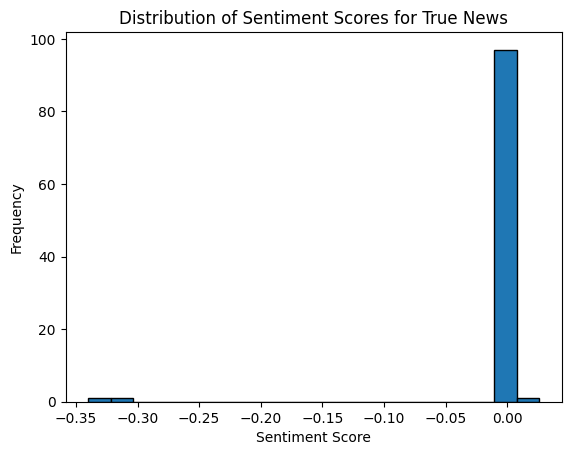

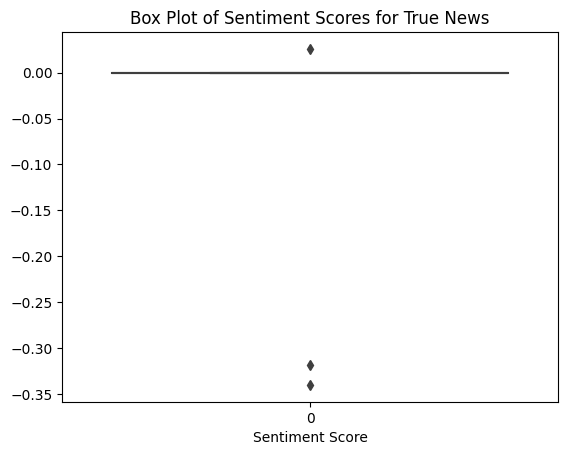

Statistics for Sentiment Scores of True News
Mean: -0.006324
Median: 0.0
Standard Deviation: 0.04620796277699332




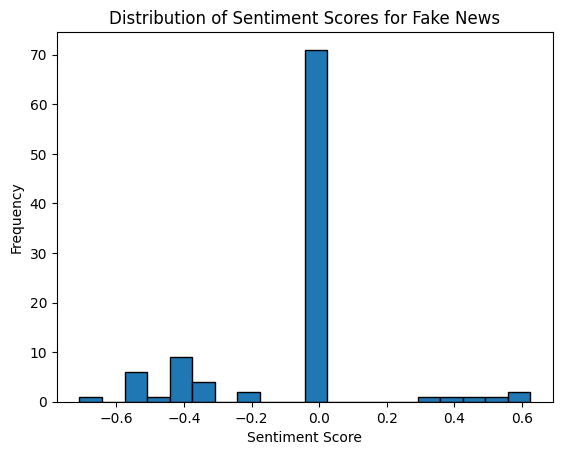

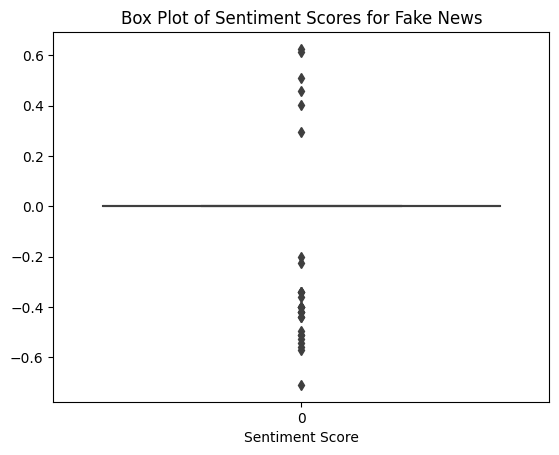

Statistics for Sentiment Scores of Fake News
Mean: -0.070811
Median: 0.0
Standard Deviation: 0.2366223146260724




In [209]:
def calculate_and_plot_statistics(sentiment_scores, title):
    # Descriptive Statistics
    mean_score = np.mean(list(sentiment_scores.values()))
    median_score = np.median(list(sentiment_scores.values()))
    std_dev = np.std(list(sentiment_scores.values()))

    # Histogram
    plt.hist(list(sentiment_scores.values()), bins=20, edgecolor='black')
    plt.xlabel('Sentiment Score')
    plt.ylabel('Frequency')
    plt.title(f'Distribution of Sentiment Scores for {title}')
    plt.show()

    # Box Plot
    sns.boxplot(list(sentiment_scores.values()))
    plt.xlabel('Sentiment Score')
    plt.title(f'Box Plot of Sentiment Scores for {title}')
    plt.show()

    # Print Statistics
    print(f"Statistics for Sentiment Scores of {title}")
    print(f"Mean: {mean_score}")
    print(f"Median: {median_score}")
    print(f"Standard Deviation: {std_dev}")
    print("\n")

# Calculate and plot for true news
calculate_and_plot_statistics(sentiment_scores_true, "True News")

# Calculate and plot for fake news
calculate_and_plot_statistics(sentiment_scores_fake, "Fake News")


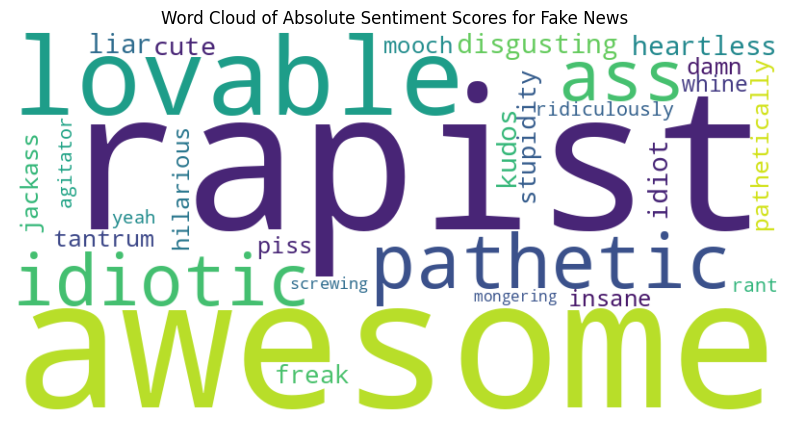

In [223]:
from wordcloud import WordCloud

# Assuming sentiment_scores_true and sentiment_scores_fake are dictionaries with words as keys and sentiment scores as values

# Function to generate and plot word cloud with absolute values of sentiment scores
def generate_and_plot_wordcloud_absolute(sentiment_scores, title):
    # Calculate absolute values of sentiment scores
    sentiment_scores_absolute = {word: abs(score) for word, score in sentiment_scores.items()}

    # Generate word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(sentiment_scores_absolute)

    # Plot word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud of Absolute Sentiment Scores for {title}')
    plt.show()

# Generate and plot word cloud for fake news with absolute sentiment scores
generate_and_plot_wordcloud_absolute(sentiment_scores_fake, "Fake News")


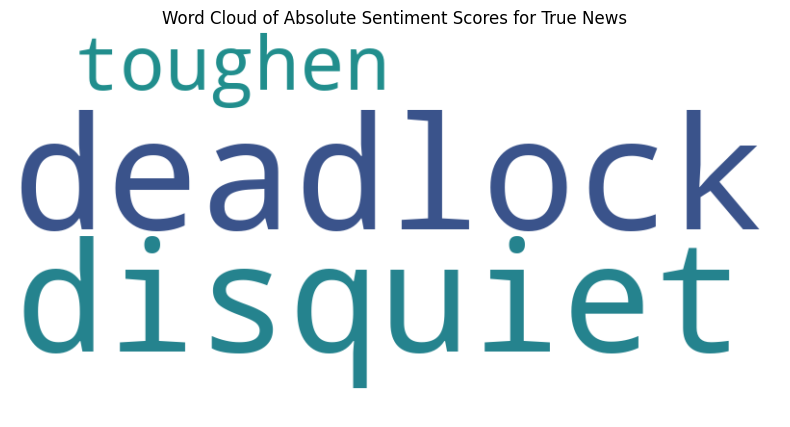

In [225]:
# Generate and plot word cloud for fake news with absolute sentiment scores
generate_and_plot_wordcloud_absolute(sentiment_scores_true, "True News")